## Lateral induction between growing cells in a density gradient

### Set up environment

In [1]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.integrate as sint
from scipy.spatial import Voronoi

import holoviews as hv
import colorcet as cc
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
%load_ext blackcellmagic

In [3]:
@numba.njit
def get_ell(rho):
    """Returns length of cel-cell contacts (hexagon side length) given cell density `rho`. """
    return np.sqrt(2 / (3 * np.sqrt(3) * rho))

In [4]:
def A_cells_um(nc, rho, A_c_rho1=800):
    """
    Returns the area of `nc` cells at density `rho` in 
    micrometers^2.
    `A_c_rho1` is the area of each cell in micrometers^2
    at a density of rho=1.
    """
    return nc * A_c_rho1 / rho

In [5]:
# Cell-cell distance when rho = 1
r0 = np.sqrt(3) * get_ell(rho = 1)

# Contact length when rho = 1
ell0 = r0 / np.sqrt(3)

# Perimeter when rho = 1
P0 = 6 * r0 / np.sqrt(3)

#### Define functions for DDE integration

In [6]:
def get_rhs(sender_idx, func):
    """Given the indices of sender cells, returns a 
    function `rhs` with call signature 
    rhs(S, S_delay, *args) that can be passed to 
    `lsig.integrate_DDE` and `lsig.integrate_DDE_varargs`.
    """

    def rhs(S, S_delay, *args):
        return func(S, S_delay, sender_idx, *args)

    return rhs

In [7]:
def tc_rhs_2a_L(S, S_delay, sender_idx, lambda_, alpha, k, p, delta, L):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get input signal across each interface
    S_bar = L @ S_delay / P0
    
    # Calculate dS/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            k ** p 
            + (delta * S_delay) ** p
            + S_bar ** p
        )
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

<hr>

## Modeling contact-dependent signaling under a density gradient

We want to simulate how cells containing this circuit might behave when they're plated in a gradient of density. In a fully accurate simulation, cells would divide stochastically to generate changes in density. However, this can be computationally expensive on the scale of $~10^4-10^5$ cells.

Instead, let us imagine a fixed number of cells embedded on a 2D surface. First we observe that if we deform the surface, cells would move closer or farther to one another. Over a long length-scale (much greater than the cell-cell distance), this is analogous to the density changes produced by cell division. We employ a strategy of applying a surface deformation on cell coordinates to mimic density changes, simulating signaling over time, then transforming back to the original coordinates. 

#### Modulating density of a surface by spatial deformation

Let us express the cell-cell distance in terms of a density function $\rho(y,t)$. Assuming an orthonormal coordinate system,

\begin{align}
r(y, t)=\frac{1}{\sqrt{\rho(y,t)}}.
\end{align}

Let's consider a deformation such that the origin $(0,0)$ remains stationary. If a cell has position $(x_i, y_i)$ in the absence of deformation, we can define a mapping to its position $(x'_i,y'_i)$ at time $t'$.

\begin{align}
y'_i &= \int_0^{y_i}{r(y,t')\,dy} \\[1em]
x'_i &= \int_0^{x_i}{r(y,t')\,dx} = x_i\, r(y_i,t')
\end{align}

To calculate this mapping, we need to define and parameterize $r(y, t)$. 

#### Defining an initial gradient of density

At the beginning of our experiment, we assume that the initial density of cells along an axis of the culture well follows an exponential gradient.

\begin{align}
\rho(y,0) &= \rho_0 e^{-ay}, \; y \geq 0
\end{align}

where $a$ parameterizes the steepness of the gradient and and $\rho(0,0)=\rho_0$. To estimate these parameters, we define the ratio 

\begin{align}
\psi = \frac{\rho_0}{\rho(y_k, 0)},
\end{align}

where $y_k > 0$ is another y-position on the surface. If we also know the average density $\overline{\rho}$ over the interval $[0,y_k]$, we can use this to solve for $a$ and $\psi$.

\begin{align}
\psi\, \rho(y_k) &= \rho_0  \\
\psi\, \rho_0 e^{-a y_k} &= \rho_0\\
\ln{\psi} &= a y_k
\end{align}

Using the definition of $\overline{\rho}$,

\begin{align}
\overline{\rho} &= \frac{1}{y_k} \int_0^{y_k} \rho_0 e^{-a y} dy \\[1em]
&= -\frac{\rho_0}{a y_k}\left(e^{-a y_k} - 1\right).
\end{align}

Then we plug in the above result $\ln{\psi} = a y_k$.

\begin{align}
\overline{\rho} &= -\rho_0\,\frac{\frac{1}{\psi} - 1}{\ln{\psi}} \\[1em]
\rho_0 &= \overline{\rho}\, \frac{\psi\ \ln{\psi}}{\psi - 1}
\end{align}


#### Calculating density over time using logistic assumption

We assume that cells follow the logistic growth equation

\begin{align}
\frac{\partial \rho(y,t)}{\partial t} &= g\,\rho(y,t)\, \left(1 - \frac{\rho(y,t)}{\rho_{\text{max}}}\right),
\end{align}

where $\rho_\text{max}$ is the maximum density at saturation and $g$ is the growth rate of the cell line. We previously non-dimensionalized chemical reaction rates to the signal decay rate [ref]. If we assume that the signal decay rate is equal to the growth rate (i.e. protein degradation contributes negligibly to decay), we can set $g=1$.

Then the full solution becomes

\begin{align}
\rho(y,t) &= \frac{\rho_\text{max} \rho_0\, e^{-ay + t}}{\rho_\text{max} + \rho_0\, e^{-ay}\left(e^t - 1\right)} \\[1em]
&= \frac{\rho_\text{max} \rho(y,0)\, e^t}{\rho_\text{max} + \rho(y,0)\left(e^t - 1\right)} \\[1em]
r(y,t) &= \sqrt{\frac{\rho_\text{max} + \rho(y,0)\left(e^t - 1\right)}{\rho_\text{max} \rho(y,0)\, e^t}}
\end{align}

We use the `numba` package to perform just-in-time compilation to machine code for efficiency.

In [8]:
@numba.njit
def rho_y_t(y, t, psi, y_k, rho_bar, rho_max):
    """
    Density of a deforming lattice over time.
    Initial condition is an exponential gradient, and growth
    follows the logistic equation.
    """
    rho_0 = rho_bar * psi * np.log(psi) / (psi - 1)
    a = np.log(psi) / y_k
    rho_y_0 = rho_0 * np.exp(-a * y)
    return rho_max * rho_y_0 * np.exp(t) / (rho_max + rho_y_0 * (np.exp(t) - 1))
    
@numba.njit
def r_y_t(y, t, psi, y_k, rho_bar, rho_max):
    """
    Cell-cell distance on a deforming lattice over time.
    Initial condition is an exponential gradient, and growth
    follows the logistic equation.
    """
    rhoyt=rho_y_t(y, t, psi, y_k, rho_bar, rho_max)
    return r0/np.sqrt(rhoyt)
    

#### Estimating density and growth parameters

We manually counted the number of cells in the densest and sparsest ends of the gradient (ROIs 1 and 2 in [ref]) and estimated $\psi \approx 7$. We define the density $\rho=1$ to be the density at which cells fill the surface area of the culture well with few to no gaps and the culture is ~100% confluent. We had previously estimated this to correspond to a density of ~$1250\; \text{mm}^{-2}$ [ref]. In [ref], a cell suspension containing 1% sender cells was plated in a gradient at time $0$ at $2500\; \text{mm}^{-2}$ ($\overline{\rho}=2$). In [ref], a cell suspension of the same ratio was plated at a starting density of $1250\; \text{mm}^{-2}$ ($\overline{\rho}=1$).

In another growth experiment [ref], we estimated the cell density at saturation to be ~$5000\; \text{mm}^{-2}$, or $\rho_\text{max}\approx4$.

In [9]:
# Set lattice size
y_k = 200

# Set density at y=0, t=0
psi = 7

# Set average density at time 0 over interval y=[0, y_k]
rho_bar = 1

# Set density at saturation
rho_max = 4

#### Calculating cell locations

First we initialize a square lattice of cells in a hexagonal mesh configuration.

In [10]:
# Set cell-cell distance
r = r0

# Set hex lattice dimensions
rows = cols = int(y_k * 2 / np.sqrt(3) / r) + 1

# Get cell coordinates and # cells
X = lsig.hex_grid(rows, cols, r=r).astype(np.float32)
n = X.shape[0]

# Make y-coordinates non-negative
refx = (cols // 2) * rows + 0
X = X - X[refx]

Then we set the time parameters for simulation.

In [11]:
# Time parameters
# Total time
tmax = 4

# Num steps per time-unit
nt_t = 100

# total num steps
nt = int(nt_t * tmax + 1)

# Time-span
t = np.linspace(0, tmax, nt, dtype=np.float32)

For demonstration purposes, we plot density vs. position for different values of time.

In [12]:
# Set y-values to visualize
ny_ = 100
y_space = np.linspace(0, y_k, ny_)

# Set time-points to visualize
nt_ = 6
t_space_ = np.linspace(0, tmax, nt_)

# Calculate density 
dens_yt = rho_y_t(
    np.tile(y_space, nt_), 
    np.repeat(t_space_, ny_), 
    psi, 
    y_k, 
    rho_bar,
    rho_max,
).reshape(nt_, ny_)

# Convert to DataFrame
data=pd.DataFrame({
    "position"       : np.tile(y_space, nt_),
    "simulation time": np.repeat(t_space_, ny_),
    "density"        : dens_yt.flatten(),
})

:NdOverlay   [simulation time]
   :Curve   [position]   (density,simulation time)
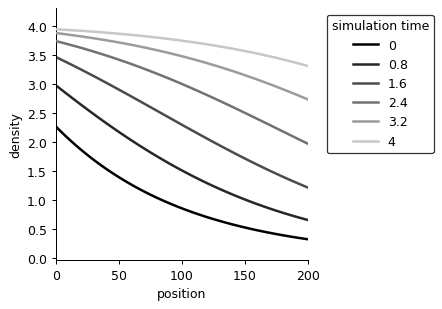

In [13]:
%%capture --no-display

# Set color cycle
cycle = lsig.sample_cycle(cc.b_linear_grey_0_100_c0[:-50], nt_)

# Plot 
plt = hv.Curve(
    data=data,
    kdims=["position"], 
    vdims=["density", "simulation time"]
).groupby(
    "simulation time"
).overlay(
).opts(
    legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
)

hv.output(plt, dpi=90)

#### Mapping cell locations

For a cell at coordinates $(x_m, y_m)$, its coordinates under lattice deformation are given by the equations 

\begin{align}
y'_m &= \int_0^{y_m}{r(y,t')\,dy}. \\[1em]
x'_m &= x_m\, r(y_m,t').
\end{align}

If we assume that cell positions are ordered such that $0 = y_0 \leq y_1 \leq\, ... y_m$ and $y'_0=y_0=0$, we can approximate the integral using the trapezoid rule.

\begin{align}
y'_m &\approx \sum_{i=1}^m {\frac{1}{2} \left(r(y_i,t') + r(y_{i-1},t') \right) \left(y_i - y_{i-1}\right)}\\[1em]
x'_m &= x_m\, r(y_m,t')
\end{align}

We use `scipy.integrate.cumtrapz()` from Scipy's integration library to evaluate this cumulative sum.

In [14]:
# Distance between rows of a hexagonal lattice
dy = r * np.sqrt(3)/2

# Initialize mapping
ymap_t = np.zeros((nt, rows))
ryt = np.zeros((nt, rows))
for i, t_ in enumerate(t):
    
    # Get cell-cell distance over y
    rhoyt = rho_y_t(np.arange(rows) * dy, t_, psi, y_k, rho_bar, rho_max)
    ryt[i] = r0/np.sqrt(rhoyt)
    
    # Approximate mapped y-coordinates
    ymap = sint.cumtrapz(ryt[i], dx=dy)
    ymap_t[i, 1:rows] = ymap

# Get mapped xy-coordinates
X_t = np.empty((nt, n, 2))
X_t[:, :, 0] = X[:, 0] * np.tile(ryt, (1, cols))
X_t[:, :, 1] = np.tile(ymap_t, (1, cols))

#### Calculating cell-cell contact lengths

To calculate signaling between cells, we require the pairwise matrix of cell-cell contact lengths at every time-point. We note that cells that are too far apart may not signal by contact-dependent means. To estimate this, we approximate each cell as a circle and assign all cells a constant cell radius equal to the side-length of the hexagonal lattice. We then calculate the contact length between two cells as the minimum of the length of their shared Voronoi ridge and the extent of intersecting lens of the two circles. Thus, when $\rho<1$ the intersection length should decrease as $\rho$ decreases, until cells no longer touch.

We store the pairwise length matrix `L` in compressed `csr_matrix` format. This step can take many minutes for large numbers of cells, so we will add a progress bar using the `tqdm` library.

In [15]:
# Progress bar
progress_bar = True

# Get cell radius from cell-cell distance
cr = r/np.sqrt(3)

# Get pairwise contact lengths at each time
iterator = X_t
if progress_bar:
    iterator = tqdm(iterator)

L_t = []
for x in iterator:
    L_t.append(lsig.make_L_gaps(Voronoi(x), cr=cr))
L_t = np.array(L_t)

100%|██████████| 401/401 [12:24<00:00,  1.86s/it]


To confirm that our procedure generated appropriate contact lengths, we will plot each cell's total shared surface area against its original y-coordinate. Cells should obtain maximum cell-cell contact when $\rho=1$, at the optimum density. 

In [16]:
# Plot total shared surface areas
plt0 = hv.Points(
    (X[:, 1], L_t[0] @ np.ones(n))
).opts(
    s=2,
    xlim=(0, y_k),
    xlabel="position",
    ylabel="shared surface area",
    title=f"Time = {t[0]:.2f}",
    ylim=(0, 4),
) 

pltfin = hv.Points(
    (X[:, 1], L_t[-1] @ np.ones(n))
).opts(
    s=2,
    xlim=(0, y_k),
    xlabel="position",
    ylabel="shared surface area",
    title=f"Time = {t[-1]:.2f}",
    ylim=(0, 4),
)

# Plot density
dens0=hv.Curve(
    (y_space, dens_yt[0])
).opts(
    color="red",
    xlabel="position",
    ylabel="density",
    ylim=(0, 4),
)

densfin=hv.Curve(
    (y_space, dens_yt[-1])
).opts(
    color="red",
    xlabel="position",
    ylabel="density",
    ylim=(0, 4),
)

:Layout
   .Points.I :Points   [x,y]
   .Curve.I  :Curve   [x]   (y)
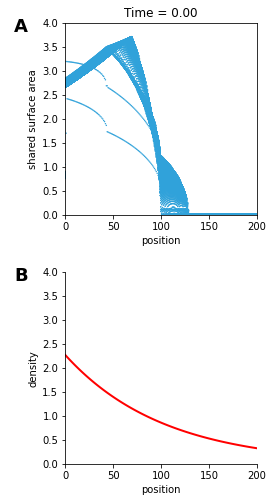

In [17]:
%%capture --no-stdout --no-display

(plt0 + dens0).cols(1)

:Layout
   .Points.I :Points   [x,y]
   .Curve.I  :Curve   [x]   (y)
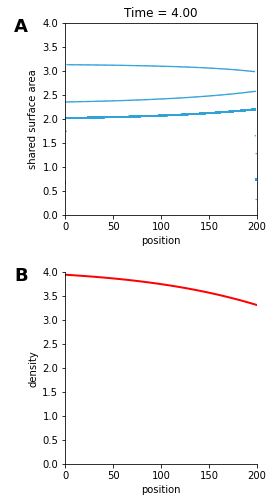

In [18]:
%%capture --no-stdout --no-display

(pltfin + densfin).cols(1)

<hr>


### Simulating signaling under a density gradient

Now we will use our DDE solver to calculate the model-predicted fluorescence under these conditions.

We randomly assign 1% of cells to be sender cells to mimic the 1:100 sender:transceiver co-culture. We fix the random seed for reproducibility, but one can repeat this process with different seeds to show that the gross behavior is minimally affected.

In [19]:
# Specify percent of population that is sender
pct_s = 1
n_s = int(n * (pct_s/100)) + 1

# Set seed
np.random.seed(5)

# Assign senders randomly
sender_idx = np.random.choice(n, n_s, replace=False)

We use our example parameter set

In [38]:
# Set RHS parameters
lambda_ = 1e-5
alpha = 3
k = 0.12
p = 2
delta = 3

# Package into args
args = (lambda_, alpha, k, p, delta, L_t[0])

# Set delay
delay = 0.4

Transceivers are initialized at zero-state initial conditions, and senders are fixed at a fluorescence of `1` (by definition). 

Since our parameter `L` (pairwise contact area) varies over time, we use the `lsig.integrate_DDE_varargs` solver, short for "variable argument(s)."

In [39]:
# Get RHS
rhs = get_rhs(sender_idx, tc_rhs_2a_L)

# Set initial conditions
S0 = np.zeros(n)
S0[sender_idx] = 1

# Perform integration (method of steps)
S_t = lsig.integrate_DDE_varargs(    
    t,
    rhs,
    var_vals=L_t,
    dde_args=args,
    E0=S0,
    delay=delay,
    progress_bar=True,
    min_delay=5,
    where_vars=5,
)

100%|██████████| 400/400 [00:01<00:00, 287.09it/s]


#### Visualizing a simulated kinematic wave

In order to mimic the appearance of the experiment, we construct a mask of cells inside a circle, similar to the circular culture well.

In [40]:
# Make mask of cells inside circle
X_dists = np.linalg.norm(X - np.array([0, y_k/2]), axis=1)
X_mask = np.array([d <= y_k/2 for d in X_dists])

# Set fluorescence to zero outside circle
S_t_cir = S_t.copy()
for i in range(nt):
    S_t_cir[i, ~X_mask] = 0

We would like to construct a Voronoi mesh and color each cell with its fluorescence value. However, this is not practical for rendering tens to hundreds of thousands of cells per frame. Instead, we will treat each cell centroid as a point in a `ColorMesh` object and use `matplotlib` to render a continuous, interpolated heatmap.

Below, we render a few example frames using `lsig.inspect_out()`. See bottom of notebook for code used to produce video [ref].

In [41]:
# Get plotting window
xlim = -y_k/2, y_k/2
ylim = 0, y_k

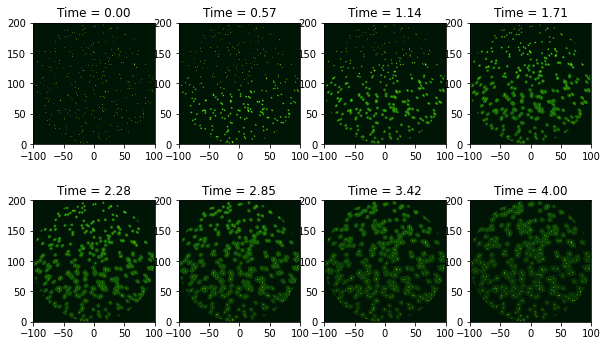

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 4

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X,
        rows=rows,
        cols=cols,
        var=S_t_cir, 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        xlim=xlim,
        ylim=ylim,
        title=title,
    )

#### Quantifying transceiver fluorescence

To understand the simulated transceiver behavior quantitatively, we divide the y-axis into `nbins` bins and sample the time-series at `nt_sample` time-points.

In [43]:
# Set y-bins
nbins = 12
y_bins = np.linspace(0, y_k, nbins + 1)

# Set time-points to sample
nt_sample = 6
t_samples = (np.linspace(0, 4, nt_sample) * nt_t).astype(int)

Experimentally, the sender cell type does not fluoresce strongly in the GFP channel. In order to better compare the *in silico* results to *in vitro*, we sample expression of only the transceiver cells by constructing a mask

In [44]:
# Transceiver mask
tc_mask = X_mask.copy()
tc_mask[sender_idx] = False

# Make bins for histogram
tc_hist = np.digitize(X[tc_mask, 1], bins = y_bins)

# Sample transceiver fluroescence
S_t_samp_tc = S_t[t_samples][:, tc_mask]

Then we calculate mean fluorescence, normalized to the maximum fluorescence at that time-point.

In [45]:
# Get fluor in bins
tc_fluor_t_bins = np.zeros((t_samples.size, nbins))
for b in range(nbins):
    tc_fluor_t_bins[:, b] = S_t_samp_tc[:, tc_hist == (b + 1)].mean(axis=1)

# Normalize
tc_normfluor_t_bins = np.zeros((t_samples.size, nbins))
tc_normfluor_t_bins = tc_fluor_t_bins / tc_fluor_t_bins.max(axis=1)[:, np.newaxis]
tc_normfluor_t_bins = np.nan_to_num(tc_normfluor_t_bins)

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Finally, we convert to DataFrame and plot a curve of normalized fluorescence over y-position at sampled time-points.

In [46]:
# Make DataFraem
normdata = pd.DataFrame(
    tc_normfluor_t_bins, 
    columns=y_bins[1:] - (np.diff(y_bins)/2), 
    index=t[t_samples],
).reset_index().melt(id_vars="index")
normdata.columns = ["simulation time", "position", "normalized fluorescence"]

:NdOverlay   [simulation time]
   :Curve   [position]   (normalized fluorescence,simulation time)
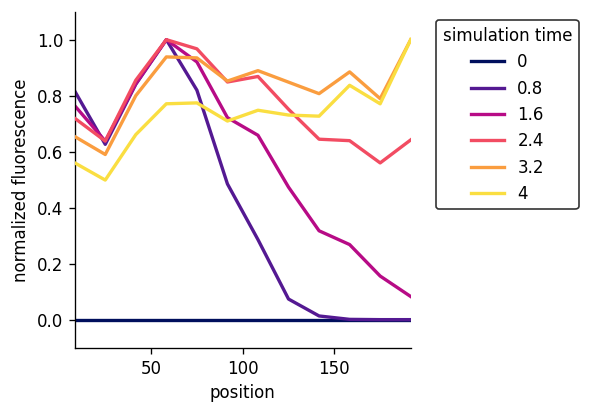

In [47]:
%%capture --no-stdout --no-display

# make color cycle
cycle = lsig.sample_cycle(cc.linear_bmy_10_95_c71[:-20], nt_sample)

# Plot
p1 = hv.Curve(
    data=normdata,
    kdims=["position"],
    vdims=["normalized fluorescence", "simulation time"],
).groupby(
    "simulation time"
).overlay(
).opts(
    legend_position="right"
).options(
    {"Curve": dict(color=cycle)}
)

hv.output(p1, dpi=120)

For comparison, we also show the unnormalized mean fluorescence in each bin.

In [48]:
# Make DataFraem
unnormdata = pd.DataFrame(
    tc_fluor_t_bins, 
    columns=y_bins[1:] - (np.diff(y_bins)/2), 
    index=t[t_samples],
).reset_index().melt(id_vars="index")
unnormdata.columns = ["simulation time", "position", "fluorescence"]

:NdOverlay   [simulation time]
   :Curve   [position]   (fluorescence,simulation time)
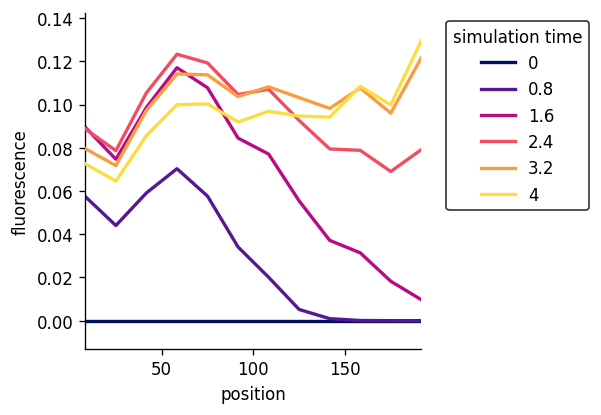

In [49]:
%%capture --no-stdout --no-display

# make color cycle
cycle = lsig.sample_cycle(cc.linear_bmy_10_95_c71[:-20], nt_sample)

# Plot
p2 = hv.Curve(
    data=unnormdata,
    kdims=["position"],
    vdims=["fluorescence", "simulation time"],
).groupby(
    "simulation time"
).overlay(
).opts(
    legend_position="right"
).options(
    {"Curve": dict(color=cycle)}
)

hv.output(p2, dpi=120)

<hr>

In [50]:
import os

### Save video

In [52]:
# Set directory
dir_name = "plots"

# Set filename
vid_fname = "geometric_model_density_gradient_rhobar_{0:.2f}_{1:.1f}pctsender".format(
    rho_bar, pct_s
)

In [53]:
# Function for plot title
title_fun = lambda i: f"Time = {t[i]:.2f}"

Writing to: plots\geometric_model_density_gradient_rhobar_1.00_1.0pctsender


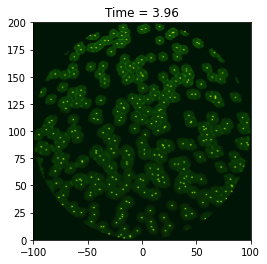

In [56]:
lsig.animate_colormesh(
    X_arr=X,
    rows=rows,
    cols=cols,
    var_t=S_t_cir,
    n_frames=100,
    file_name=vid_fname,
    dir_name=dir_name,
    fps=20, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
)

#### Save plot

In [57]:
# Set directory
dir_name = "plots"

# Set filename
p1_fname = "geometric_model_density_gradient_plot_rhobar_{0:.2f}_{1:.1f}pctsender".format(
    rho_bar, pct_s
)

# Set format
fmt='png'

In [59]:
%%capture --no-display

p1_path = os.path.join(dir_name, p1_fname)
hv.save(p1, p1_path, fmt=fmt)

<hr>

In [60]:
%load_ext watermark

In [61]:
%watermark -v -p numpy,scipy,numba,holoviews,jupyterlab

CPython 3.7.7
IPython 7.18.1

numpy 1.18.1
scipy 1.4.1
numba 0.51.2
holoviews 1.13.2
jupyterlab 1.2.6


<hr>

$$\rho_0 = 2$$